# Random forest assignment For Lead Case study

Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

# Data Preparation

In [1]:
#Supressing the warnings
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#Importing the Numpy and Pandas
import numpy as np
import pandas as pd


In [3]:
# Importing all datasets
lead = pd.read_csv("")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Let's check the dimensions of our dataframe
lead.shape


(9240, 37)

In [5]:
#Let's look at the sttistical aspects of our dataframe
lead.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Let's see the type of each column
lead.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Data Cleaning

In [8]:
# Convert Select to nan
lead=lead.replace('Select',np.nan)


In [9]:
#Adding up the missing values(Column wise)
lead.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Dropping the column which has 70% greater than the nan values i.e. Lead Prof
lead=lead.drop('Lead Profile',1)


In [12]:
lead=lead.drop('How did you hear about X Education',1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

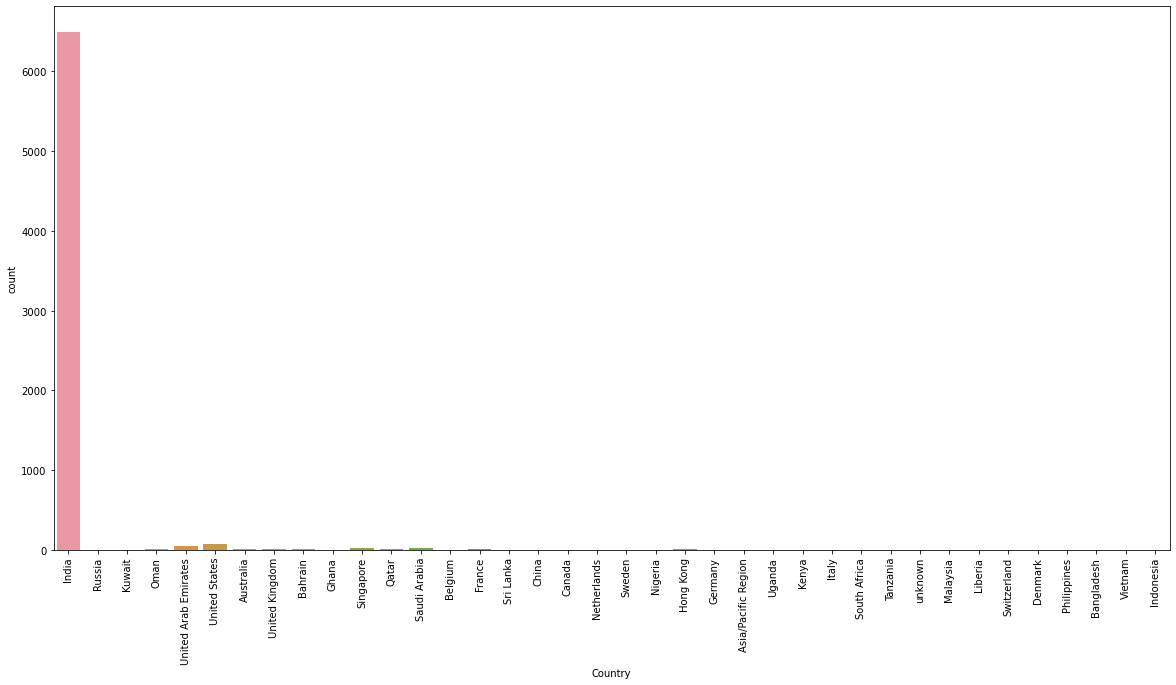

In [15]:
plt.figure(figsize=(20,10)) 
sns.countplot(lead['Country'])
plt.xticks(rotation=90)

In [16]:
lead['Country']=lead['Country'].replace(np.nan,'India')

In [17]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

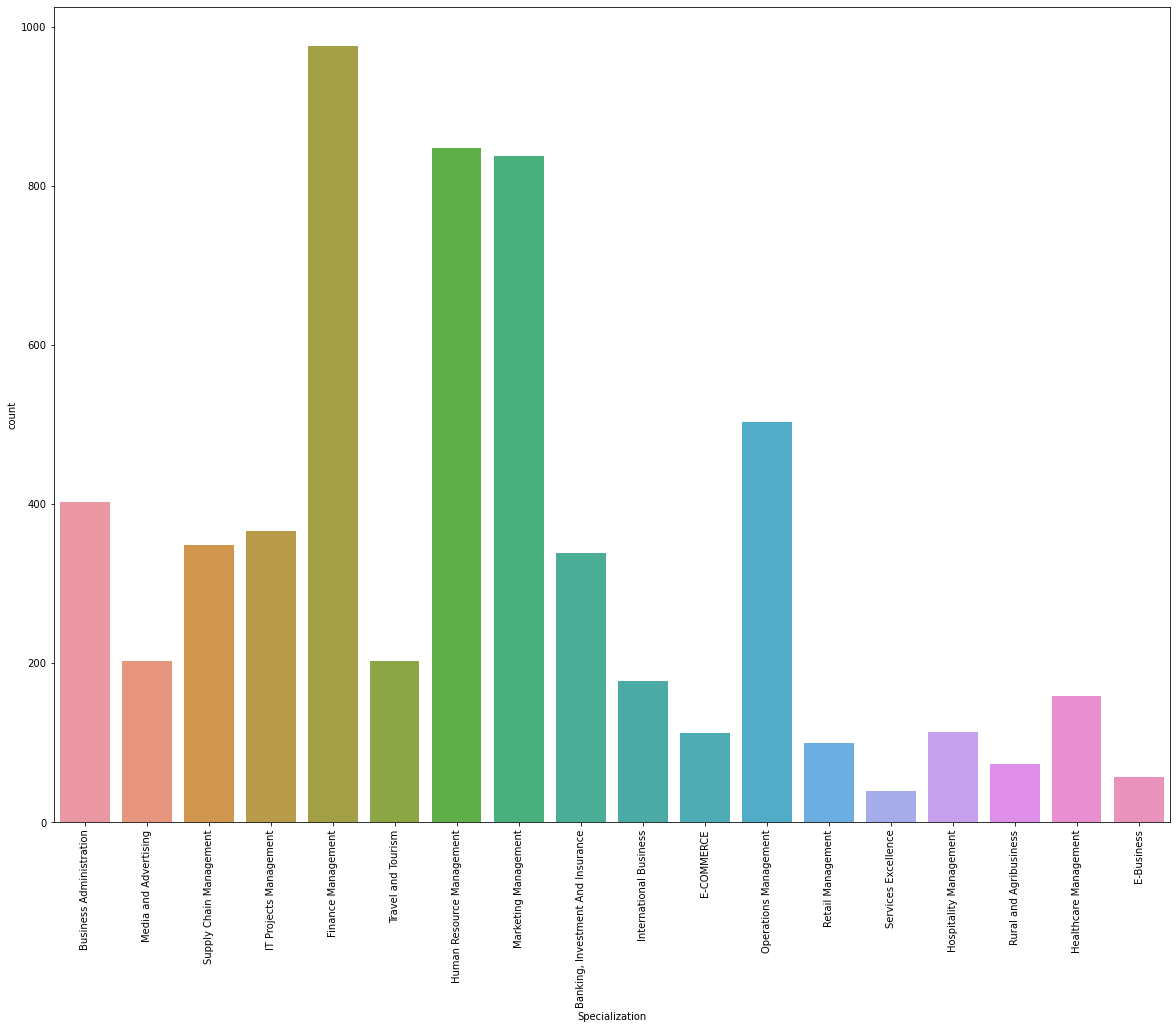

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(lead['Specialization']) 
plt.xticks(rotation=90)

In [19]:
lead['Specialization']=lead['Specialization'].replace(np.nan,'Others')

In [20]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

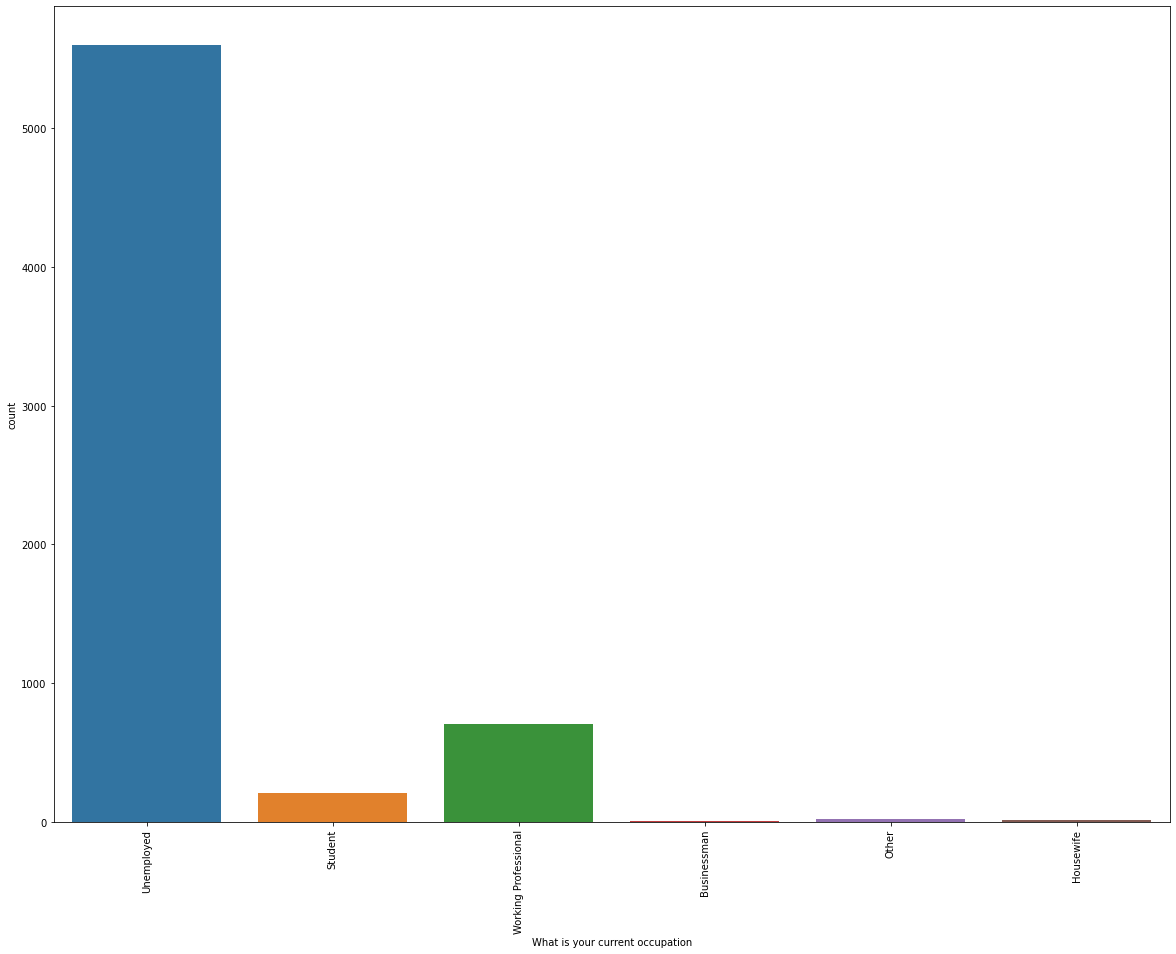

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(lead['What is your current occupation']) 
plt.xticks(rotation=90)


In [22]:
lead['What is your current occupation']=lead['What is your current occupation']

In [23]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

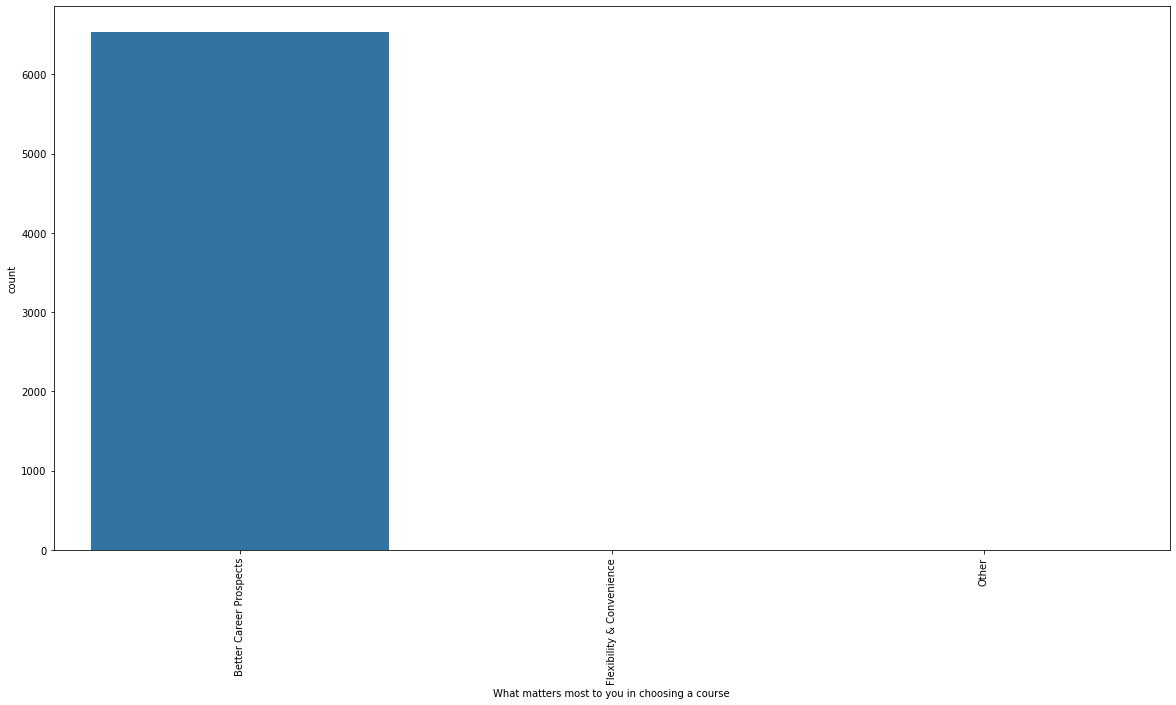

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(lead['What matters most to you in choosing a course']) 
plt.xticks(rotation=90)


In [25]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course']

In [26]:
lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

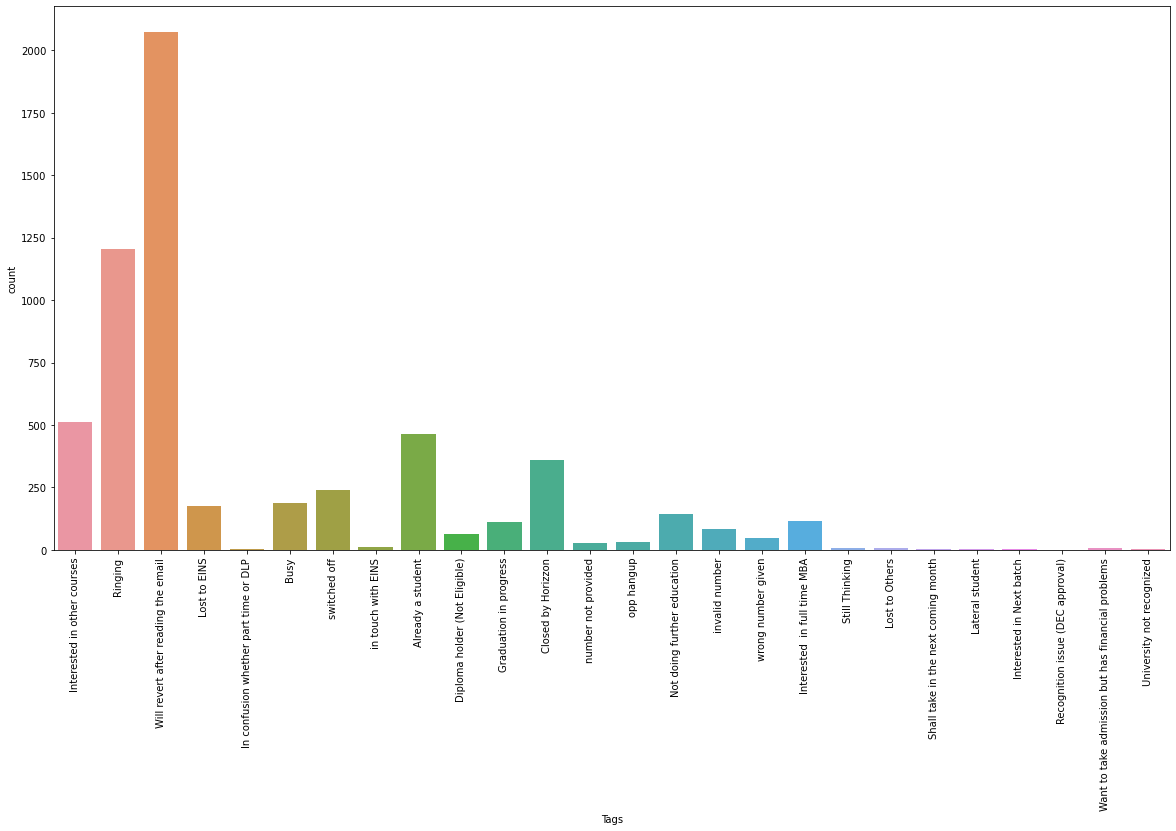

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Tags']) 
plt.xticks(rotation=90)


In [28]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [29]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

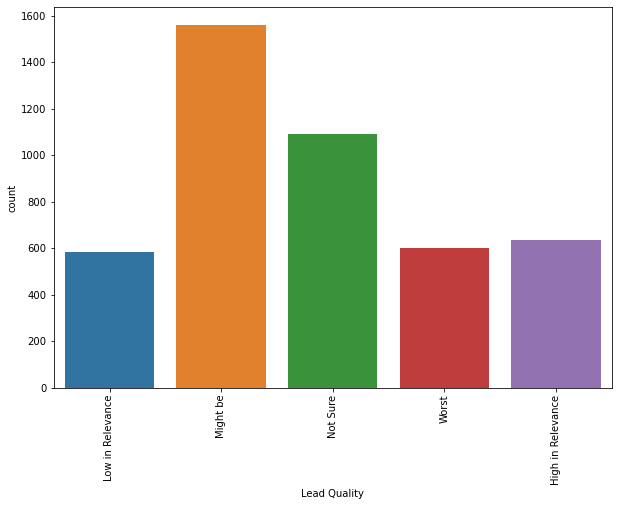

In [30]:
plt.figure(figsize=(10,7)) 
sns.countplot(lead['Lead Quality'])
plt.xticks(rotation=90)

In [31]:
lead['Lead Quality']=lead['Lead Quality'].replace(np.nan,'Not Sure')

In [32]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

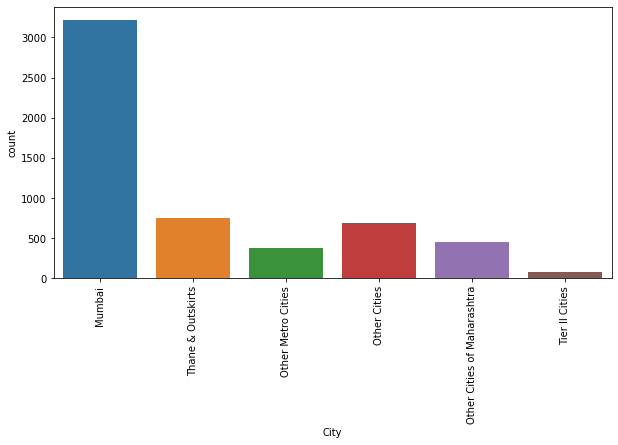

In [33]:
plt.figure(figsize=(10,5)) 
sns.countplot(lead['City']) 
plt.xticks(rotation=90)

In [34]:
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [35]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [36]:
lead['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

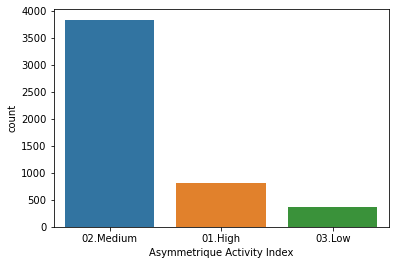

In [37]:
plt1=sns.countplot(lead['Asymmetrique Activity Index'])

In [38]:
lead['Asymmetrique Profile Index'].describe()

count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object

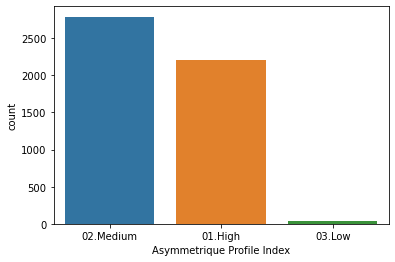

In [39]:
plt2=sns.countplot(lead['Asymmetrique Profile Index'])

In [40]:
lead['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

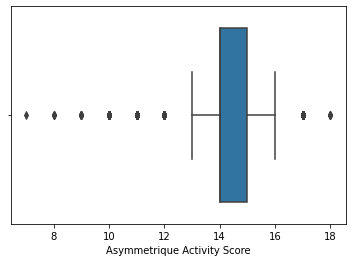

In [41]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [42]:
lead['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

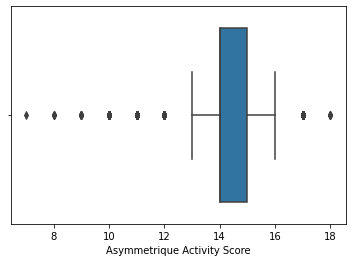

In [43]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [44]:
lead =lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [45]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [46]:
lead.dropna(inplace=True)

In [47]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [48]:
lead.to_csv('Leads_cleaned')

In [49]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

48.10106716886378

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

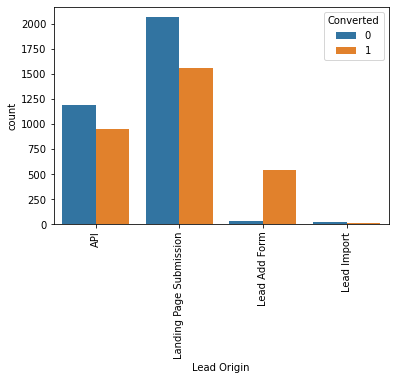

In [50]:
sns.countplot(x='Lead Origin',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

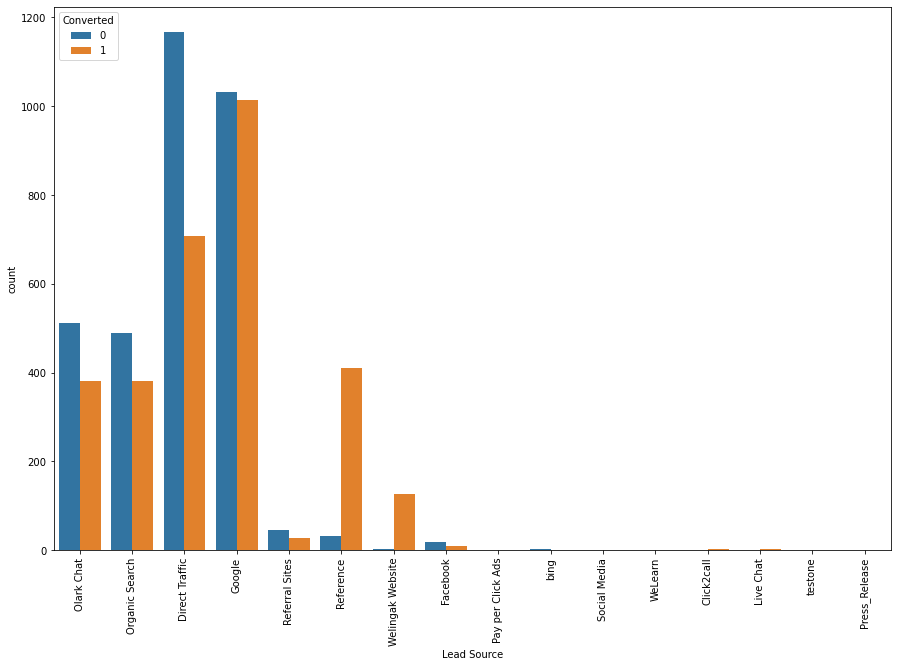

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)


In [52]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

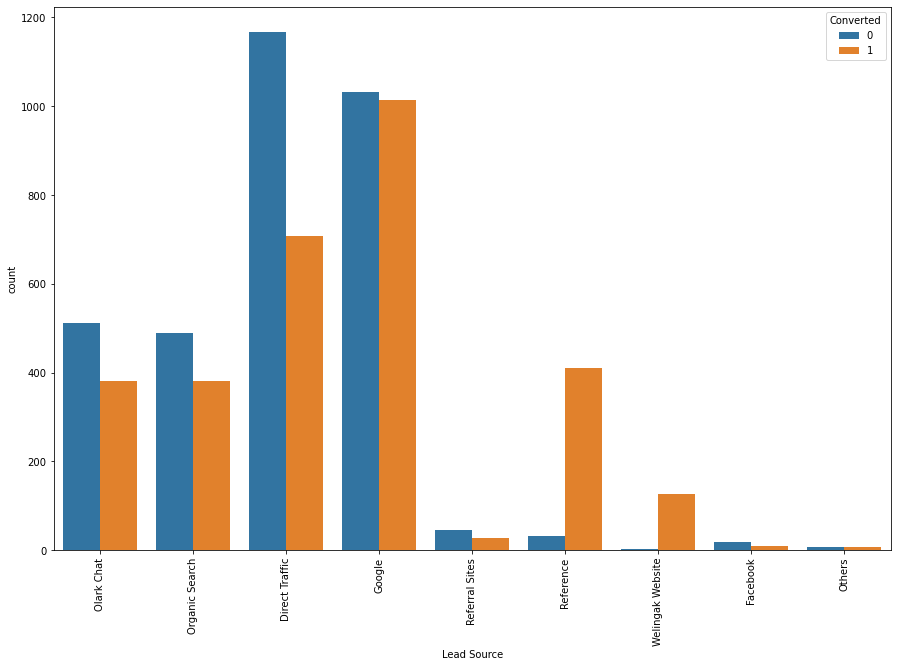

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)


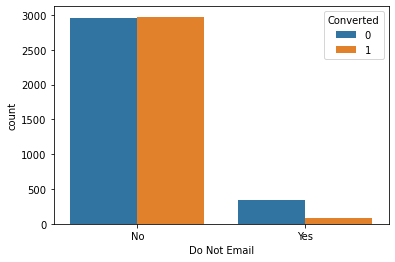

In [54]:
sns.countplot(x='Do Not Email',hue='Converted',data=lead)

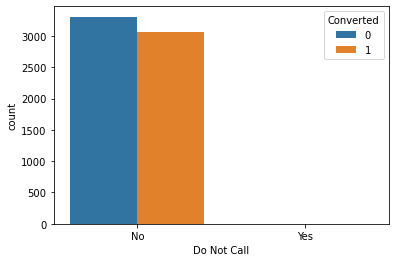

In [55]:
sns.countplot(x='Do Not Call',hue='Converted',data=lead)

In [56]:
lead['TotalVisits'].describe(percentiles=(.05,.10,.25,.50,.75,.90,.95,.99))

count    6372.000000
mean        3.606717
std         4.852274
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.290000
max       251.000000
Name: TotalVisits, dtype: float64

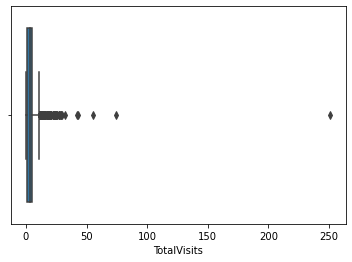

In [57]:
sns.boxplot(lead['TotalVisits'])

In [58]:
percentiles=lead['TotalVisits'].quantile([0.05,0.95]).values 
lead['TotalVisits'][lead['TotalVisits']<=percentiles[0]]=percentiles[0] 
lead['TotalVisits'][lead['TotalVisits']>=percentiles[1]]=percentiles[1]

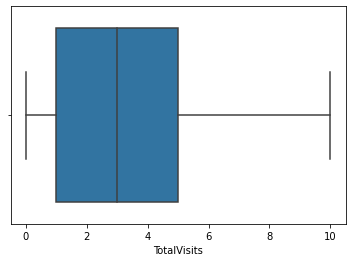

In [59]:
sns.boxplot(lead['TotalVisits'])

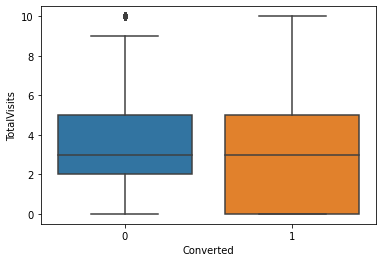

In [60]:
sns.boxplot(y='TotalVisits',x='Converted',data=lead)

In [61]:
lead['Total Time Spent on Website'].describe()

count    6372.000000
mean      535.279190
std       565.402288
min         0.000000
25%        34.000000
50%       287.000000
75%      1022.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

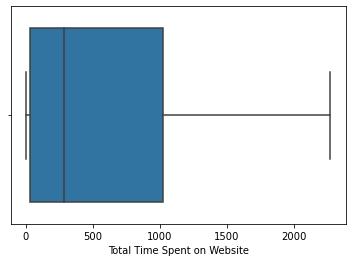

In [62]:
sns.boxplot(lead['Total Time Spent on Website'])

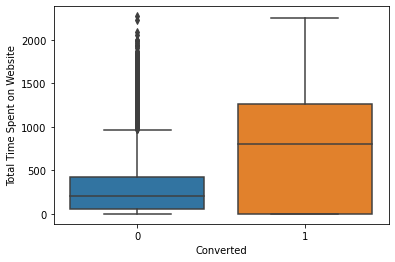

In [63]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead)

In [64]:
lead['Page Views Per Visit'].describe()

count    6372.000000
mean        2.479565
std         2.166345
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

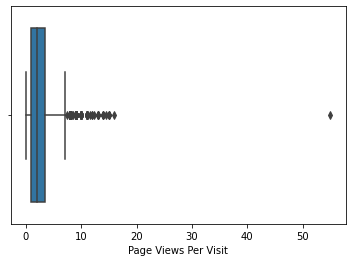

In [65]:
sns.boxplot(lead['Page Views Per Visit'])

In [66]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][ lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][ lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


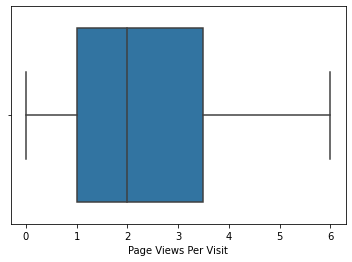

In [67]:
sns.boxplot(lead['Page Views Per Visit'])

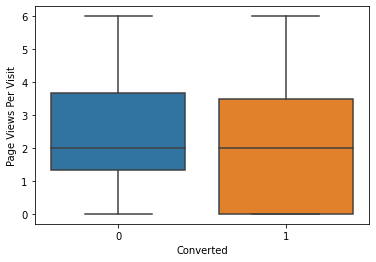

In [68]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)

In [69]:
lead['Last Activity'].describe()

count             6372
unique              16
top       Email Opened
freq              2455
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

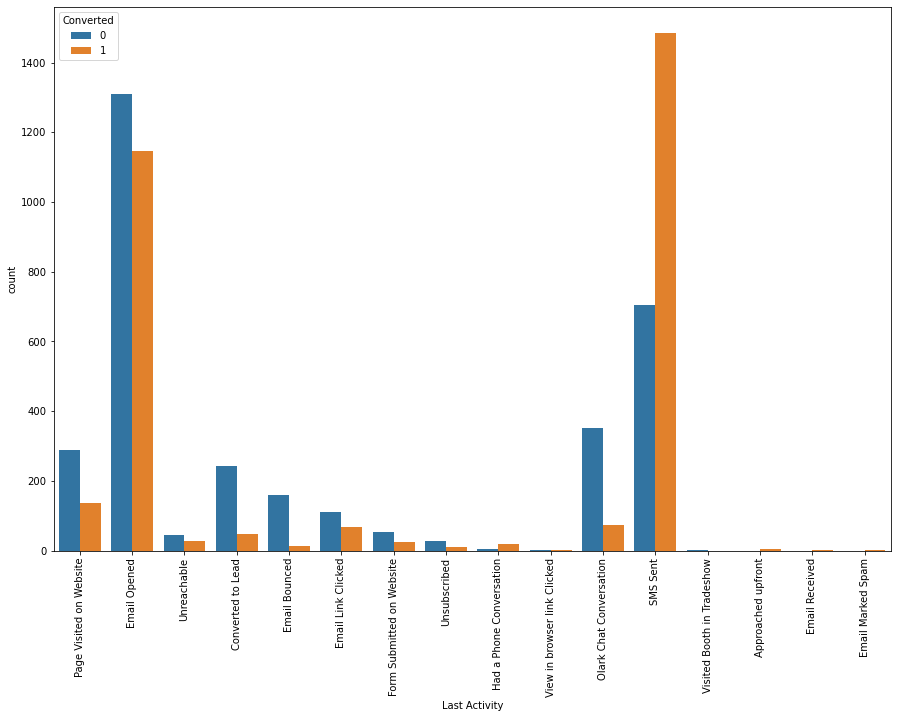

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead) 
plt.xticks(rotation=90)


In [71]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

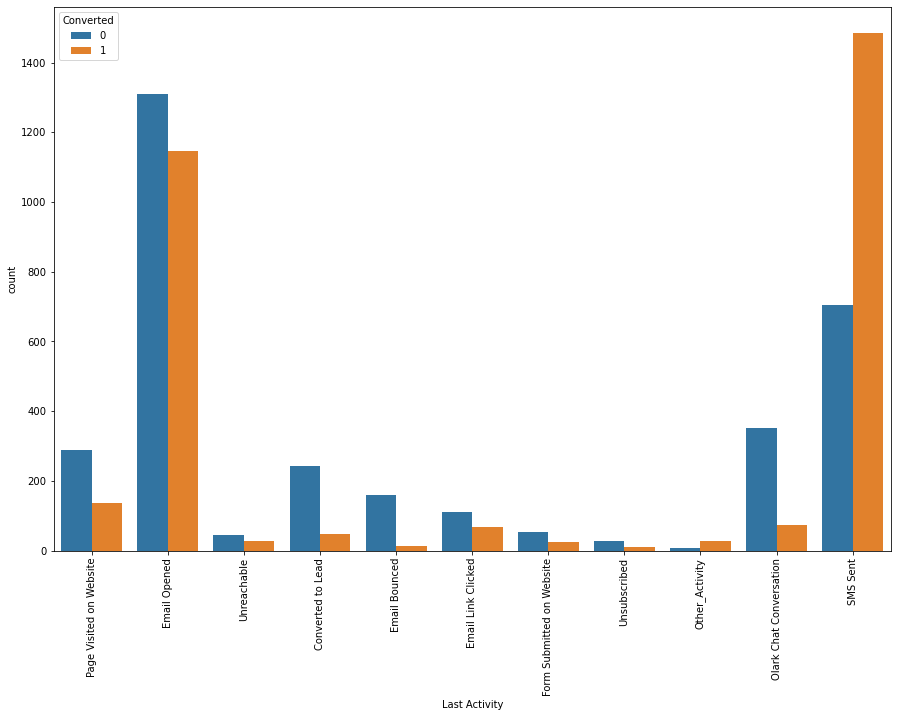

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)


In [73]:
lead.Country.describe()

count      6372
unique       33
top       India
freq       6171
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

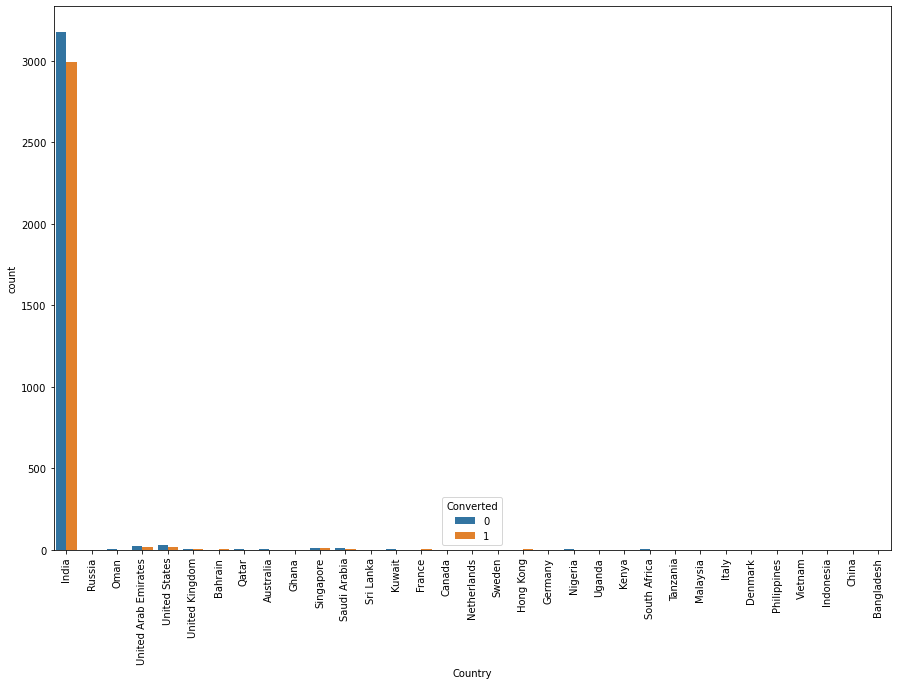

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead) 
plt.xticks(rotation=90)


In [75]:
lead['Country']=lead['Country'].replace(['Russia','Kuwait','Oman','Bahrain'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

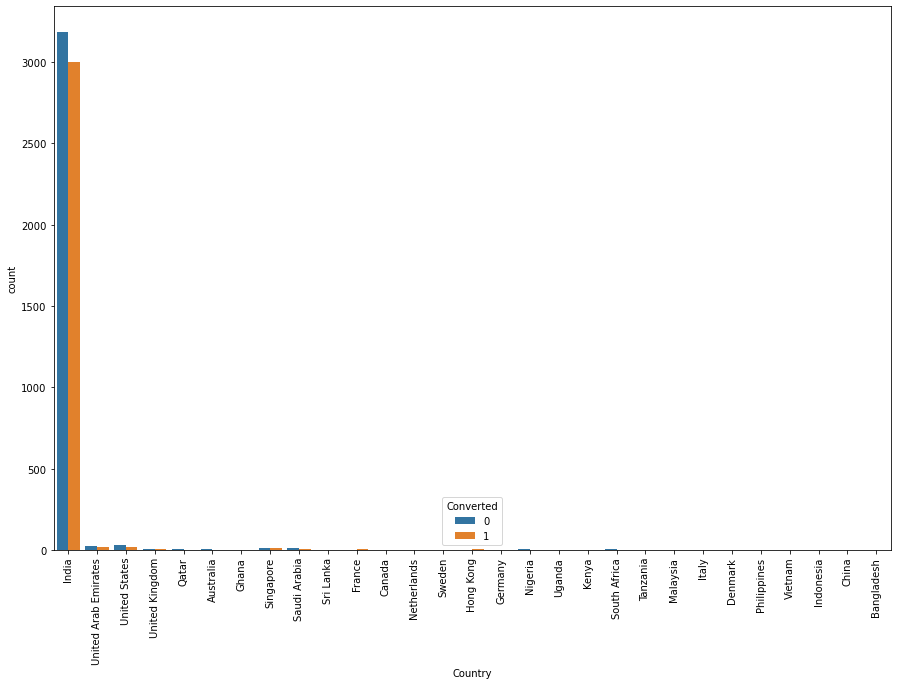

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead) 
plt.xticks(rotation=90)


In [77]:
lead['Specialization'].describe()

count       6372
unique        19
top       Others
freq        1838
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

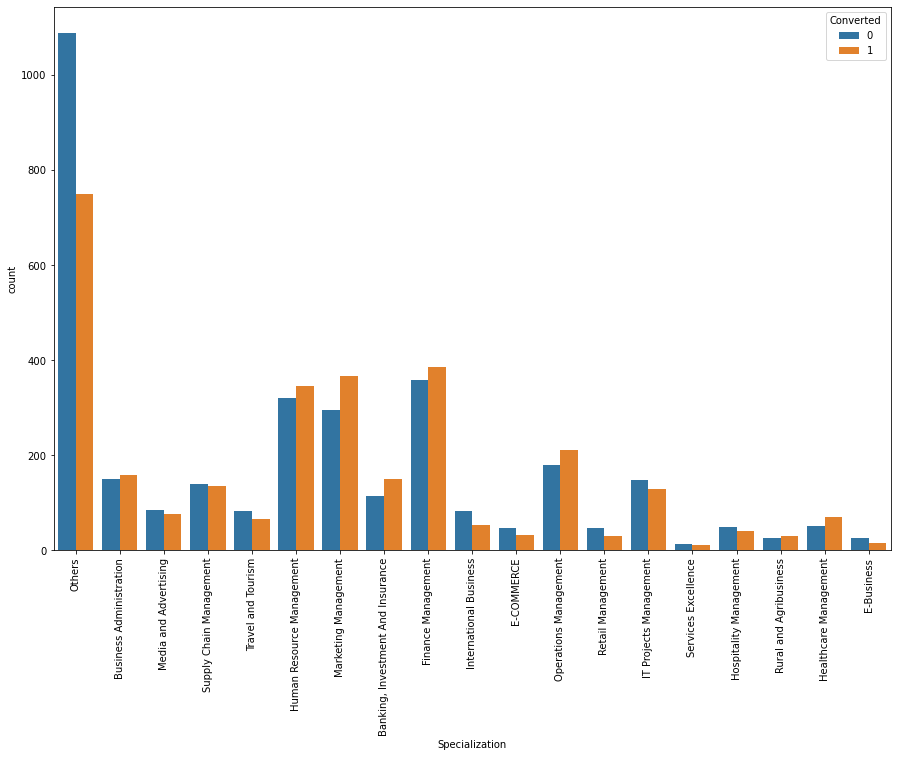

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)


In [79]:
lead['Specialization'] = lead['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

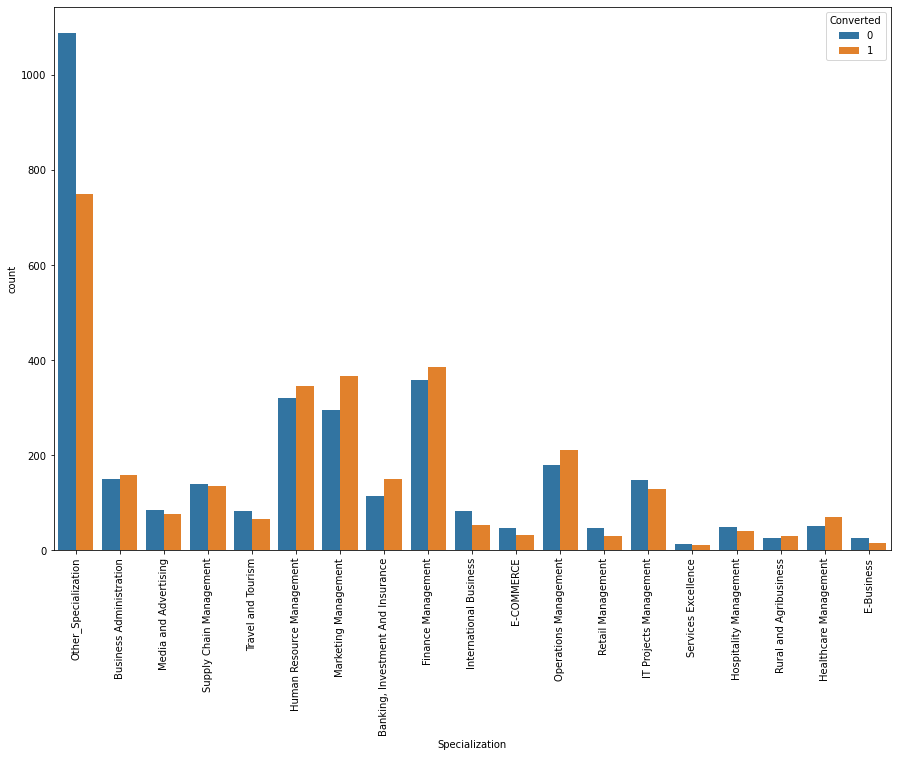

In [80]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [81]:
lead['What is your current occupation'].describe()

count           6372
unique             6
top       Unemployed
freq            5475
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

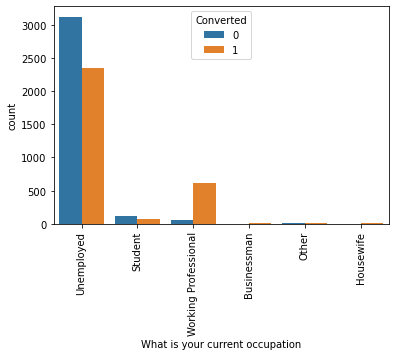

In [82]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)


In [83]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

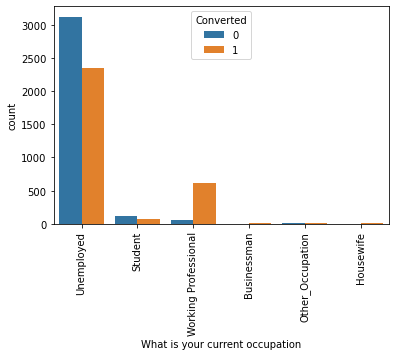

In [84]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead) 
plt.xticks(rotation=90)

In [85]:
lead['What matters most to you in choosing a course'].describe()

count                        6372
unique                          3
top       Better Career Prospects
freq                         6370
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

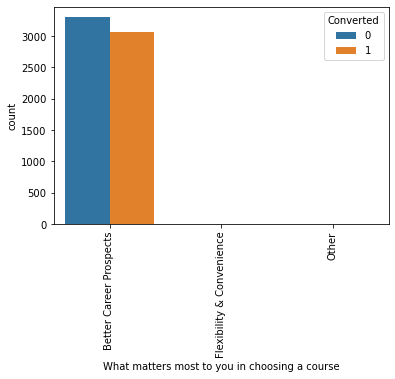

In [86]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [87]:
lead['Search'].describe()

count     6372
unique       2
top         No
freq      6362
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

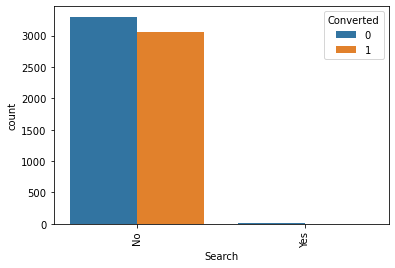

In [88]:
sns.countplot(x='Search',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [89]:
lead['Magazine'].describe()

count     6372
unique       1
top         No
freq      6372
Name: Magazine, dtype: object

In [90]:
lead['Newspaper Article'].describe()

count     6372
unique       2
top         No
freq      6371
Name: Newspaper Article, dtype: object

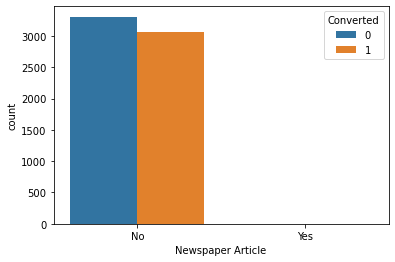

In [91]:
sns.countplot(x='Newspaper Article',hue='Converted',data=lead)

In [92]:
lead['X Education Forums'].describe()

count     6372
unique       1
top         No
freq      6372
Name: X Education Forums, dtype: object

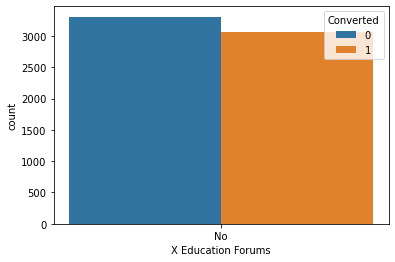

In [93]:
sns.countplot(x='X Education Forums',hue='Converted',data=lead)

In [94]:
lead['Newspaper'].describe()

count     6372
unique       2
top         No
freq      6371
Name: Newspaper, dtype: object

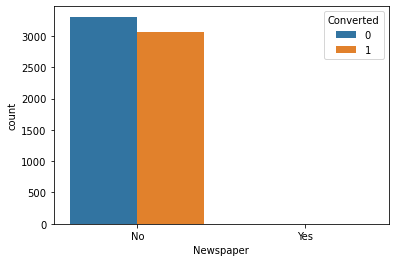

In [95]:
sns.countplot(x='Newspaper',hue='Converted',data=lead)

In [96]:
lead['Digital Advertisement'].describe()

count     6372
unique       2
top         No
freq      6369
Name: Digital Advertisement, dtype: object

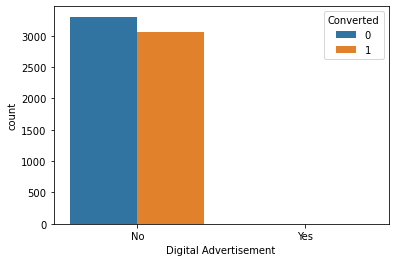

In [97]:
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead)

In [98]:
lead['Through Recommendations'].describe()

count     6372
unique       2
top         No
freq      6366
Name: Through Recommendations, dtype: object

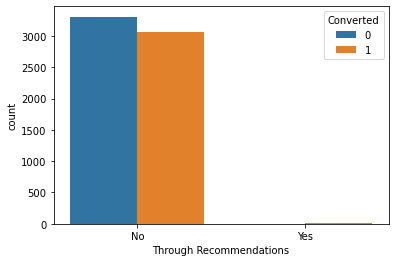

In [99]:
sns.countplot(x='Through Recommendations',hue='Converted',data=lead)

In [100]:
lead['Receive More Updates About Our Courses'].describe()

count     6372
unique       1
top         No
freq      6372
Name: Receive More Updates About Our Courses, dtype: object

In [101]:
lead['Tags'].describe()

count                                    6372
unique                                     26
top       Will revert after reading the email
freq                                     2722
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

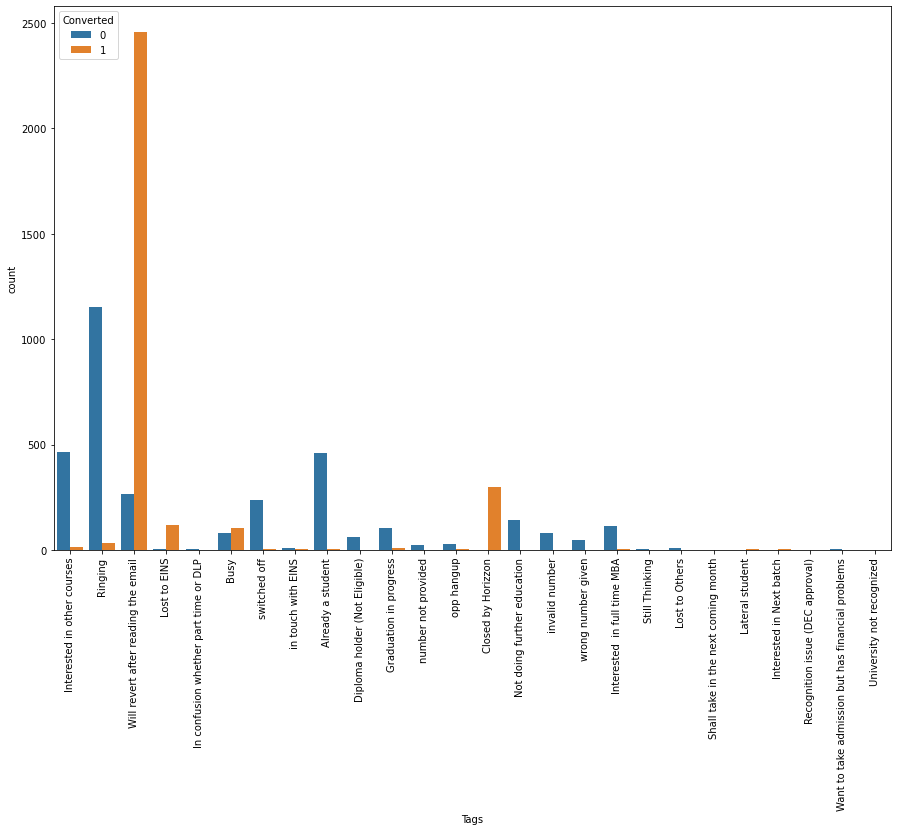

In [102]:
plt.figure(figsize=(15,10)) 
sns.countplot(x='Tags',hue='Converted',data=lead) 
plt.xticks(rotation=90)

In [103]:
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems', 'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

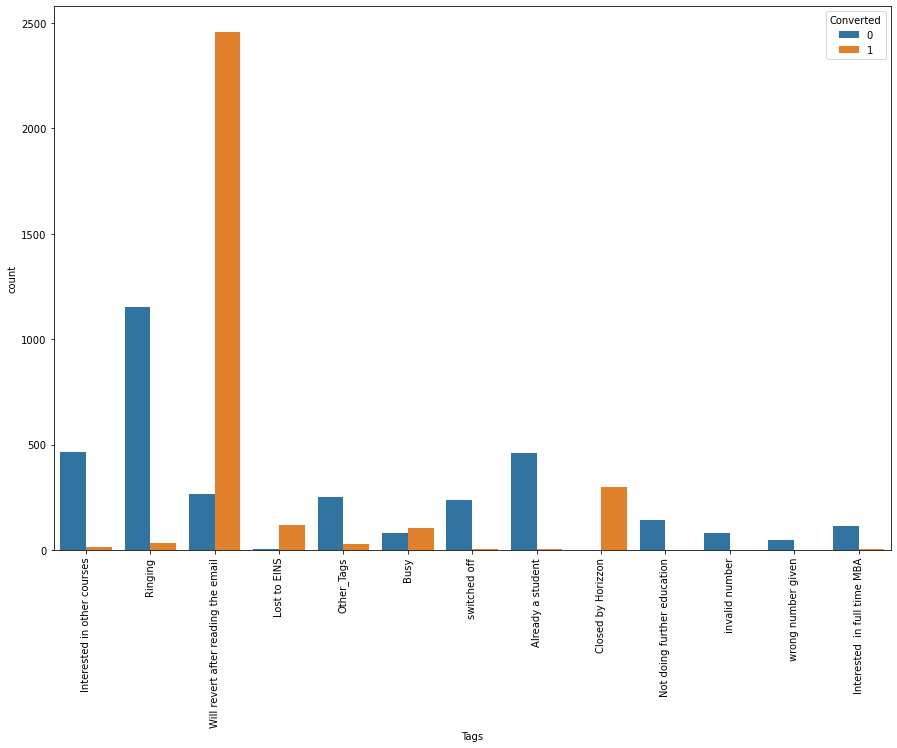

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [105]:
lead['Lead Quality'].describe()

count         6372
unique           5
top       Not Sure
freq          3104
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

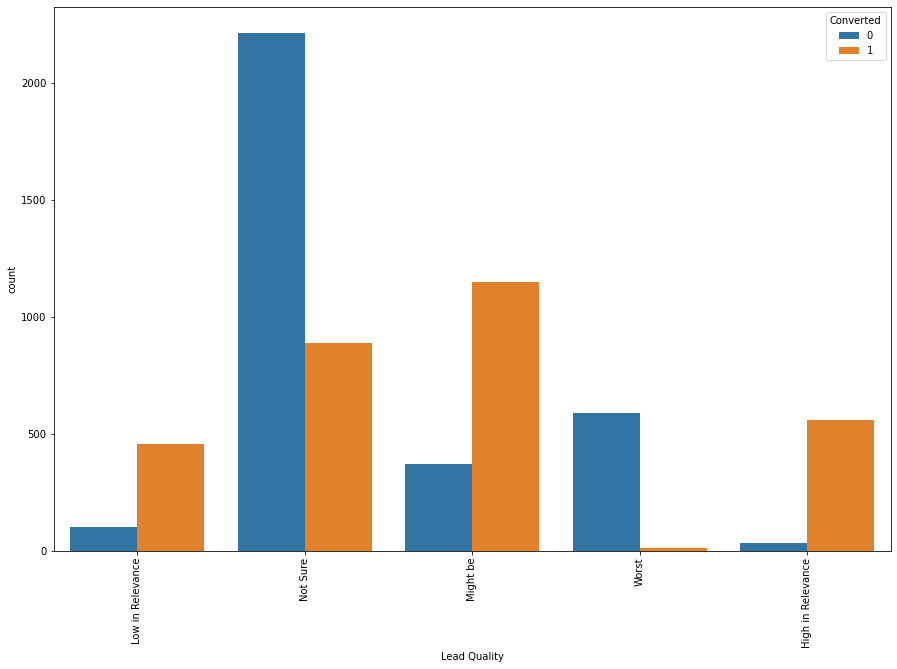

In [106]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Quality',hue='Converted',data=lead) 
plt.xticks(rotation=90)


In [107]:
lead['Update me on Supply Chain Content'].describe()

count     6372
unique       1
top         No
freq      6372
Name: Update me on Supply Chain Content, dtype: object

In [108]:
lead['Get updates on DM Content'].describe()

count     6372
unique       1
top         No
freq      6372
Name: Get updates on DM Content, dtype: object

In [109]:
lead['City'].describe()

count       6372
unique         6
top       Mumbai
freq        4592
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

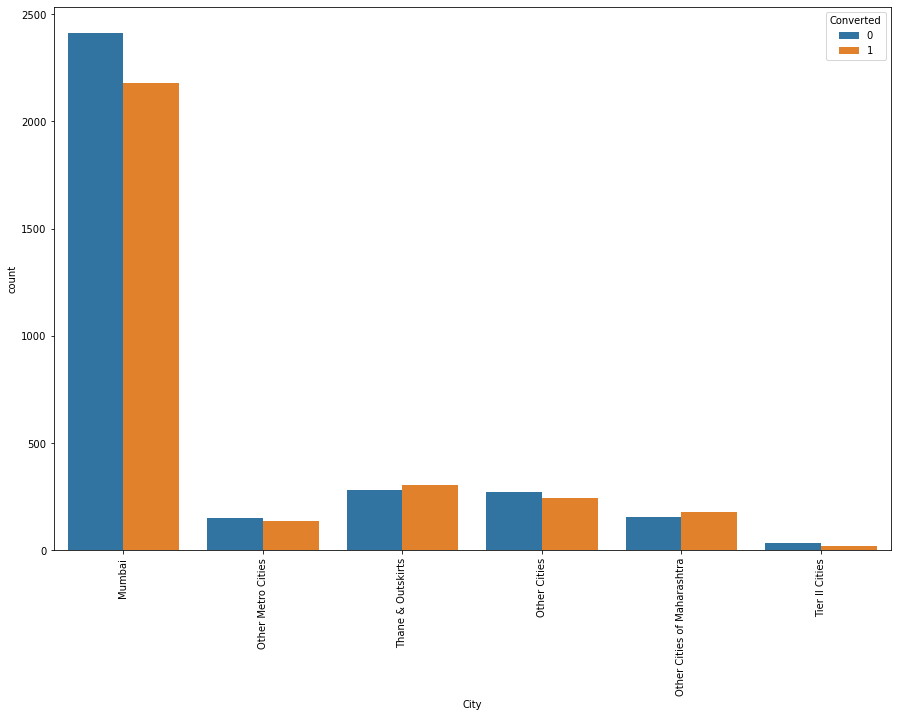

In [110]:
plt.figure(figsize=(15,10)) 
sns.countplot(x='City',hue='Converted',data=lead) 
plt.xticks(rotation=90)

In [111]:
lead['I agree to pay the amount through cheque'].describe()

count     6372
unique       1
top         No
freq      6372
Name: I agree to pay the amount through cheque, dtype: object

In [112]:
lead['A free copy of Mastering The Interview'].describe()

count     6372
unique       2
top         No
freq      4201
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

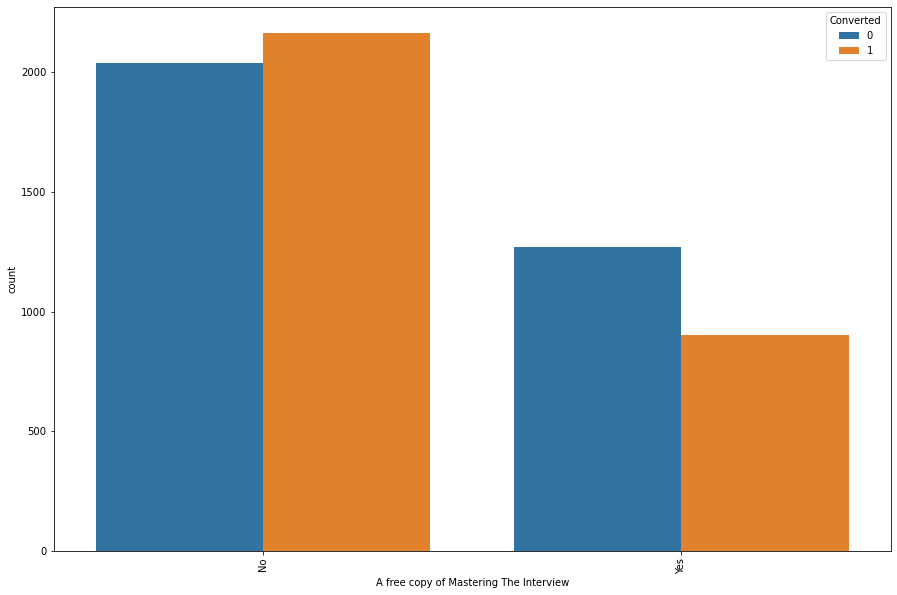

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead)
plt.xticks(rotation=90)


In [114]:
lead['Last Notable Activity'].describe()

count             6372
unique              14
top       Email Opened
freq              2038
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

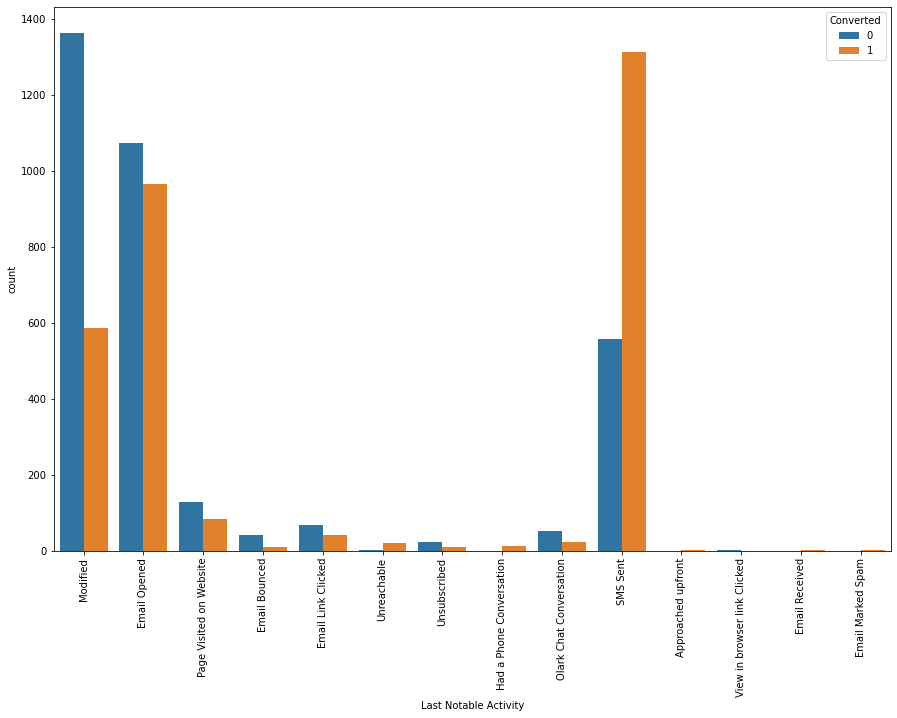

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead) 
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

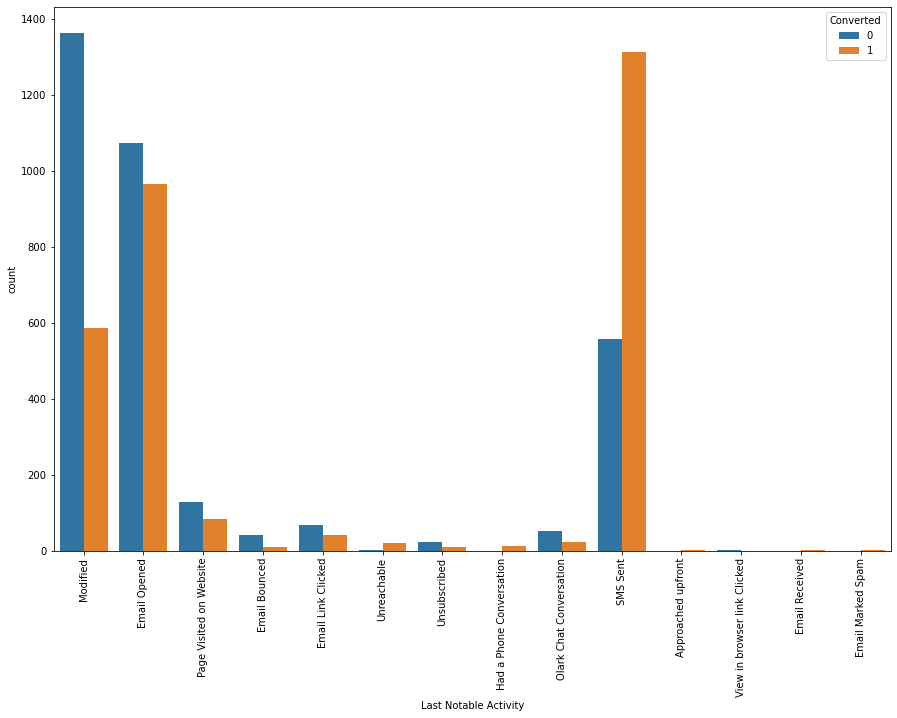

In [116]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead) 
plt.xticks(rotation=90)


In [117]:
lead= lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [118]:
lead.shape

(6372, 16)

In [119]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [120]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
lead_categorical = lead.select_dtypes(include=['object'])
lead_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [121]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
lead_categorical = lead_categorical.apply(le.fit_transform)
lead_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,3064,0,3,0,0,7,13,4,4,1,0,7
1,1070,0,4,0,0,3,13,4,8,3,0,4
2,3583,1,0,0,0,3,1,3,9,2,0,4
3,318,1,0,0,0,9,11,4,8,3,0,7
4,1303,1,2,0,0,0,13,4,9,2,0,7


In [122]:
# concat df_categorical with original df
lead= lead.drop(lead_categorical.columns, axis=1)
lead = pd.concat([lead, lead_categorical], axis=1)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,0,0.0,0,0.0,3064,0,3,0,0,7,13,4,4,1,0,7
1,0,5.0,674,2.5,1070,0,4,0,0,3,13,4,8,3,0,4
2,1,2.0,1532,2.0,3583,1,0,0,0,3,1,3,9,2,0,4
3,0,1.0,305,1.0,318,1,0,0,0,9,11,4,8,3,0,7
4,1,2.0,1428,1.0,1303,1,2,0,0,0,13,4,9,2,0,7


In [123]:
# Let's understand the type of columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Converted                        6372 non-null   int64  
 1   TotalVisits                      6372 non-null   float64
 2   Total Time Spent on Website      6372 non-null   int64  
 3   Page Views Per Visit             6372 non-null   float64
 4   Prospect ID                      6372 non-null   int32  
 5   Lead Origin                      6372 non-null   int32  
 6   Lead Source                      6372 non-null   int32  
 7   Do Not Email                     6372 non-null   int32  
 8   Do Not Call                      6372 non-null   int32  
 9   Last Activity                    6372 non-null   int32  
 10  Specialization                   6372 non-null   int32  
 11  What is your current occupation  6372 non-null   int32  
 12  Tags                

# Data Preparation and Model Building

In [124]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [125]:
# Putting feature variable to X
X = lead.drop('Converted',axis=1)

# Putting response variable to y
y = lead['Converted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Default Hyperparameters



Let's first fit a random forest model with default hyperparameters.

In [126]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [127]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
# Making predictions
predictions = rfc.predict(X_test)

In [129]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [130]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1007
           1       0.94      0.94      0.94       905

    accuracy                           0.94      1912
   macro avg       0.94      0.94      0.94      1912
weighted avg       0.94      0.94      0.94      1912



In [131]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[950  57]
 [ 56 849]]


In [132]:
print(accuracy_score(y_test,predictions))

0.9408995815899581


# Hyperparameter Tuning

# Tuning max_depth

In [133]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [134]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.498734,0.048198,0.038352,0.011714,2,{'max_depth': 2},0.877803,0.873318,0.859865,0.892377,...,0.876682,0.010517,4,0.870796,0.879484,0.887052,0.883128,0.879484,0.879989,0.005381
1,0.790890,0.090112,0.037067,0.006622,7,{'max_depth': 7},0.924888,0.923767,0.910314,0.926009,...,0.922197,0.006000,3,0.932455,0.938621,0.940022,0.934417,0.937500,0.936603,0.002777
2,0.840950,0.047655,0.048094,0.003310,12,{'max_depth': 12},0.938341,0.932735,0.918161,0.942825,...,0.933408,0.008347,1,0.978419,0.981502,0.982343,0.978139,0.978980,0.979877,0.001713
3,0.822639,0.027481,0.046634,0.005283,17,{'max_depth': 17},0.930493,0.930493,0.919283,0.940583,...,0.932511,0.008158,2,0.998879,0.998879,0.998599,0.998879,0.999159,0.998879,0.000177


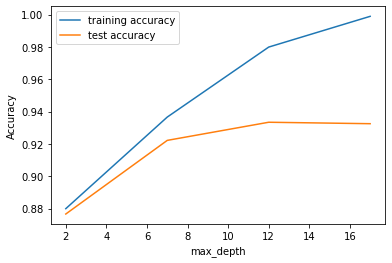

In [135]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Tuning n_estimators

In [136]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [137]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.594259,0.064547,0.047449,0.005645,100,{'n_estimators': 100},0.904709,0.891256,0.883408,0.913677,...,0.900448,0.011353,2,0.895740,0.896581,0.910874,0.900224,0.905549,0.901794,0.005707
1,2.572849,0.144226,0.174683,0.056034,500,{'n_estimators': 500},0.903587,0.902466,0.877803,0.903587,...,0.898879,0.010645,3,0.904148,0.906670,0.904148,0.892657,0.907231,0.902971,0.005310
2,4.855701,0.375261,0.305372,0.060117,900,{'n_estimators': 900},0.905830,0.906951,0.878924,0.903587,...,0.898879,0.010333,3,0.901065,0.908072,0.905269,0.896861,0.897141,0.901682,0.004426
3,7.829761,0.976779,0.520386,0.088214,1300,{'n_estimators': 1300},0.903587,0.905830,0.883408,0.906951,...,0.901121,0.008924,1,0.903307,0.909473,0.912276,0.897982,0.906951,0.905998,0.004978


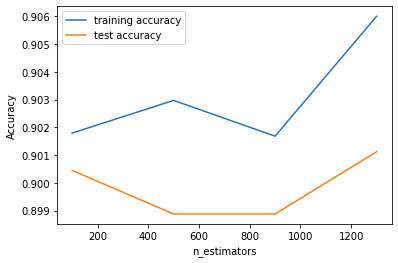

In [138]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning max_features

In [139]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [140]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.651149,0.072951,0.042279,0.003180,4,{'max_features': 4},0.911435,0.901345,0.890135,0.921525,...,0.906951,0.010564,2,0.910594,0.908632,0.916200,0.908072,0.910314,0.910762,0.002883
1,0.842317,0.084455,0.037092,0.007231,8,{'max_features': 8},0.911435,0.904709,0.899103,0.910314,...,0.905381,0.004840,3,0.906390,0.910034,0.912556,0.905269,0.907791,0.908408,0.002614
2,1.105113,0.060883,0.031704,0.008015,14,{'max_features': 14},0.918161,0.910314,0.915919,0.924888,...,0.915695,0.005690,1,0.917040,0.914798,0.922365,0.924327,0.914518,0.918610,0.004013
3,0.101049,0.015642,0.000000,0.000000,20,{'max_features': 20},NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.092008,0.008978,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


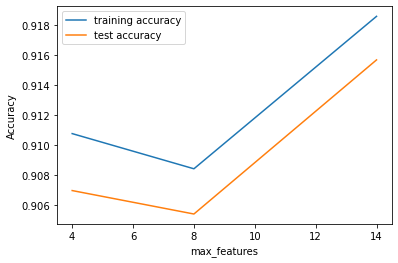

In [141]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Tuning min_samples_leaf

In [142]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.575459,0.041663,0.043335,0.015605,100,{'min_samples_leaf': 100},0.884529,0.890135,0.864350,0.884529,...,0.883184,0.009911,1,0.884529,0.892096,0.896861,0.881166,0.881726,0.887276,0.006177
1,0.547229,0.063408,0.038247,0.008305,150,{'min_samples_leaf': 150},0.874439,0.872197,0.854260,0.868834,...,0.867937,0.007104,2,0.868834,0.872758,0.881166,0.865191,0.868274,0.871244,0.005514
2,0.521259,0.044732,0.038680,0.008150,200,{'min_samples_leaf': 200},0.877803,0.872197,0.852018,0.864350,...,0.867937,0.009063,2,0.873879,0.872197,0.876682,0.864630,0.869114,0.871300,0.004140
3,0.601709,0.084955,0.046020,0.017378,250,{'min_samples_leaf': 250},0.876682,0.864350,0.834081,0.865471,...,0.858744,0.014409,5,0.853139,0.865191,0.867993,0.866592,0.858184,0.862220,0.005657
4,0.553973,0.032066,0.038743,0.003686,300,{'min_samples_leaf': 300},0.875561,0.873318,0.839686,0.862108,...,0.864350,0.013151,4,0.859025,0.872758,0.871917,0.865751,0.867433,0.867377,0.004939


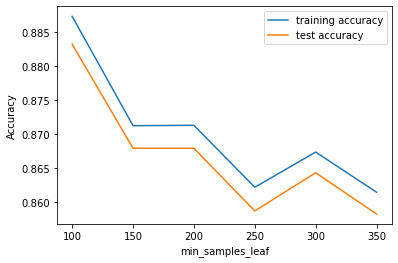

In [144]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_split

In [145]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [146]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.616354,0.028275,0.041913,0.005511,200,{'min_samples_split': 200},0.922646,0.909193,0.884529,0.924888,...,0.909865,0.014385,1,0.912276,0.911996,0.915919,0.916480,0.911715,0.913677,0.002075
1,0.604400,0.056015,0.039831,0.004761,250,{'min_samples_split': 250},0.913677,0.909193,0.889013,0.910314,...,0.905381,0.008672,2,0.911996,0.909753,0.911435,0.902186,0.905549,0.908184,0.003754
2,0.595493,0.033039,0.031198,0.005416,300,{'min_samples_split': 300},0.905830,0.906951,0.887892,0.901345,...,0.901570,0.007104,3,0.900224,0.909473,0.908913,0.895740,0.906390,0.904148,0.005332
3,0.569386,0.027513,0.033859,0.010487,350,{'min_samples_split': 350},0.908072,0.903587,0.880045,0.896861,...,0.899103,0.010299,5,0.905830,0.903307,0.910034,0.888453,0.904428,0.902410,0.007342
4,0.629941,0.054098,0.038662,0.007950,400,{'min_samples_split': 400},0.900224,0.892377,0.885650,0.913677,...,0.900224,0.010348,4,0.897141,0.892657,0.911996,0.913117,0.903587,0.903700,0.008031


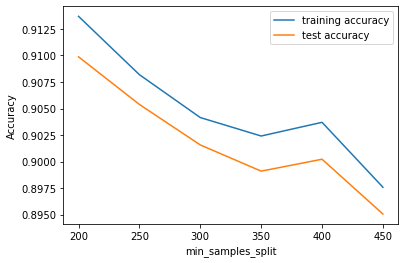

In [147]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid Search to Find Optimal Hyperparameters

In [148]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [149]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [150]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.906947545695112 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


Fitting the final model with the best parameters obtained from grid search.

In [151]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [152]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
# predict
predictions = rfc.predict(X_test)

In [154]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1007
           1       0.90      0.91      0.90       905

    accuracy                           0.91      1912
   macro avg       0.91      0.91      0.91      1912
weighted avg       0.91      0.91      0.91      1912



In [156]:
print(confusion_matrix(y_test,predictions))

[[914  93]
 [ 83 822]]
